# Fundamentos IA y Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 4
<p>Modelos de Regresión y Clasificación II.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
import numpy as np
import math

# Trabajar con dataset
import pandas as pd
from sklearn import metrics

# Presentación de datos
import seaborn as sns
import matplotlib.pyplot as plt

<div style="font-size:14px; text-align:justify"><b>PROBLEMA I.-</b><br></div>

Dada la siguiente red neuronal entrenada:

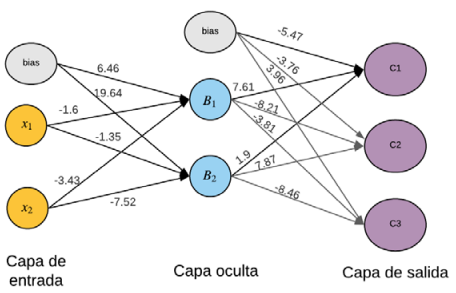

Se pide hallar:
- Predicciones del modelo para el conjunto de test dado.
- Evaluar el rendimiento del clasificador.

In [2]:
# Lectura del fichero de test
p1_test=pd.read_csv('l4p1_test.csv')
# Creación de lista patrones segun el total
patrones=[i for i in range(1, len(p1_test)+1)]
p1_test=p1_test.assign(Patrón=patrones)
# Indice por patrón
p1_test.set_index('Patrón', inplace=True)
p1_test

,x1,x2,clase
Patrón,,,
1,1.5,0.2,1
2,1.4,0.3,1
3,1.6,0.4,1
4,1.1,0.1,2
5,4.3,1.3,1
6,3.0,1.1,2
7,4.9,2.0,2
8,6.1,1.9,2
9,4.4,1.2,3


In [3]:
pesos_c_entrada=[[6.46, -1.6, -3.43],
                 [19.64, -1.35, -7.52]]
peses_c_salida=[[-5.47, 7.61, 1.9],
                [-3.76, -8.21, 7.87],
                [3.96, -3.81, -8.46]]

<div style="font-size:14px; text-align:justify"><b>1: </b>Calcular el modelo de la red neuronal.</div>

El primer paso, será calcular la función de transferencia B1 y B2 y despues la probabilidad para cada clase.<br>
Para el calculo de las funciones de transferencia será mediante la **Red Neuronal Sigmoidal**.

In [4]:
# Paso 1: Función de activación de la neurona según modelo aditivo.
def mod_aditivo(pesos:list, inputs:list, sesgo=None):
    # Calculo de constante  de sesgo
    if sesgo == None:
        sesgo=1
        
    # Añadir en inputs el valor de sesgo
    inputs.insert(0, sesgo)
    
    # Aplicar el sumatorio del producto del peso por valor de entrada
    sumatorio=0
    for peso, x_input in zip(pesos, inputs):
        sumatorio+=peso*x_input
            
    return round(sumatorio, 2)


# Paso 2: Función de transferencia de la red Neuronal: Sigmoide (SUNN)
def sunn(func_activacion):
    return round(1/(1+math.e**-func_activacion), 2)


# Paso 3: Calculo funciones de transferencia
def func_trans(neuronas:int, df:pd.DataFrame):   
    for i in range(neuronas):
        # Lista para valores segun inputs
        func_trans_x=[]
        # print('Neurona ', i)
        for patron in range(len(df)):
            # print('Patron ',patron)
            b_x=sunn(mod_aditivo(
                pesos_c_entrada[i],[df.iloc[patron][0], df.iloc[patron][1]]))
            func_trans_x.append(b_x)
            # print('Calculos ',func_trans_x)
        
        # Asignar valores obtenidos a nueva columna
        df=df.assign(new_col=func_trans_x)
        # Obtener nombre de columna por iteración
        func_trans_name=f'''B{i+1}'''
        df.rename({'new_col':func_trans_name}, axis='columns', inplace=True)
        
    # Recolocar la columna Clase
    clase_col=df.pop('clase')
    # Insertar en posición, nombre columna, datos columna
    df.insert(len(df.columns), 'clase', clase_col)
    
    return df


# Paso 4: Calculo de las probabilidades de pertenencia a la clase
def prob_cls(clases:int, df:pd.DataFrame):   
    for i in range(clases):
        # Lista para almacenar probabilidades
        prob_b_x=[]
        
        # Recorrer patrones y calcular su probabilidad
        for patron in range(len(df)):
            b_x=sunn(mod_aditivo(
                peses_c_salida[i],[df.iloc[patron][2], df.iloc[patron][3]]))
            prob_b_x.append(b_x)
        
        # Asignar valores obtenidos a nueva columna
        df=df.assign(new_col=prob_b_x)
        # Obtener nombre de columna por iteración
        func_trans_name=f'''P_c{i+1}'''
        df.rename({'new_col':func_trans_name}, axis='columns', inplace=True)
    
    # Obtener predicciones
    preds=[]
    for i in range(1, len(df)+1):
        if df.loc[i, 'P_c1'] > (df.loc[i, 'P_c2']+df.loc[i, 'P_c3']):
            preds.append(1)
        elif df.loc[i, 'P_c2'] > (df.loc[i, 'P_c1']+df.loc[i, 'P_c3']):
            preds.append(2)
        elif df.loc[i, 'P_c3'] > (df.loc[i, 'P_c1']+df.loc[i, 'P_c2']):
            preds.append(3)
            
    df=df.assign(prediccion=preds)
    
    # Recolocar la columna Clase
    clase_col=df.pop('clase')
    # Insertar en posición, nombre columna, datos columna
    df.insert(len(df.columns), 'clase', clase_col)
    
    return df


# p1_test.drop([11, 12], inplace=True)
# p1_test['x1']=[1.4,1.5,1.5,1.6,4,4.2,4.1,5.1,5,5.1]
# p1_test['x2']=[0.2,0.2,0.4,0.6,1.3,1.2,1.3,1.9,1.9,1.8]
# p1_test['clase']=[1,1,1,2,2,2,3,3,3,3]

# Resultados: 
# 1- Claculo funciones de transferencia.
p1_results=func_trans(2, p1_test)
# 2-Calculo probabilidades de clase
p1_results=prob_cls(3, p1_results)
p1_results

,x1,x2,B1,B2,P_c1,P_c2,P_c3,prediccion,clase
Patrón,,,,,,,,,
1,1.5,0.2,0.97,1.00,0.98,0.02,0.00,1,1
2,1.4,0.3,0.96,1.00,0.98,0.02,0.00,1,1
3,1.6,0.4,0.93,1.00,0.97,0.03,0.00,1,1
4,1.1,0.1,0.99,1.00,0.98,0.02,0.00,1,2
5,4.3,1.3,0.01,0.98,0.03,0.98,0.01,2,1
6,3.0,1.1,0.11,1.00,0.06,0.96,0.01,2,2
7,4.9,2.0,0.00,0.12,0.01,0.06,0.95,3,2
8,6.1,1.9,0.00,0.05,0.00,0.03,0.97,3,2
9,4.4,1.2,0.01,0.99,0.03,0.98,0.01,2,3


<div style="font-size:14px; text-align:justify"><b>2: </b>Evaluar el rendimiento del clasificador en dicho conjunto.</div>

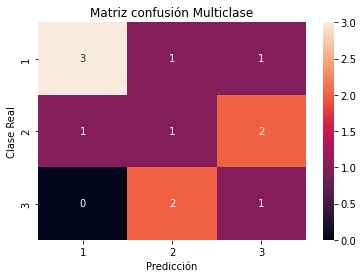

CCR: 0.42
Kappa: 0.12


In [5]:
# Calcular matriz de confusión y las métricas CCR y Kappa para el modelo.
# Matriz de confusión
def cm_values(pred, real):
    '''
    Cálculo de las celdas de la matriz de confusión.
    :param pred: Valores predecidos.
    :param real: Valores reales.
    '''
    clases=real.unique() # Total de clases en set
    matrix=[] # Resultado de valores de matriz
    clase_valores=[0 for i in range(len(clases))] # Valores para cada clase
    
    for clase in range(len(clases)):
        for y, y_pred in zip(real, pred):
            if y == clases[clase]:
                if y_pred == y:
                    # El valor de la diagonal de la matriz como positivo
                    clase_valores[clase] += 1
                elif y_pred != y:
                    # Recorrer resto de clases y ver cual coincide
                    for x in clases:
                        if y_pred == x:
                            clase_valores[x-1] += 1
                            
        # Agregar lista de valores de la clase vista
        matrix.append(clase_valores)
        clase_valores=[0 for i in range(len(clases))] # Reset de lista de valores
        
    # Ploteado de matriz
    sns.heatmap(matrix, annot=True, 
                xticklabels= clases, yticklabels= clases).set(
        title='Matriz confusión Multiclase', xlabel='Predicción', ylabel='Clase Real')
    plt.show()
    
    return

        
cm_values(p1_results['prediccion'],p1_results['clase'])

# Accuracy del modelo. CCR
print(f"CCR: {metrics.accuracy_score(p1_results['clase'], p1_results['prediccion']):.2f}")
print(f"Kappa: {metrics.cohen_kappa_score(p1_results['clase'], p1_results['prediccion']):.2f}")

Evaluación de las  métricas para cada clase del set de datos. Estas metricas son las vistas teóricamente y ya desarrolladas en la actividad 2. En esta caso, se empleará el módulo **Scikit-learn** de Python para el cálculo de la mismas.

In [6]:
def info_class(cfm, index:int):
    '''
    TN, FN, TP, FP para la clase en set multiclase
    :param index: Indice de la matriz como clase a evaluar
    '''
    # Valor de la diagonal coincidente con la prediccion y real
    tp=cfm[index][index]
    
    # Valores fuera de la fila y columna de la clase
    tn=0
    # Recorrer filas no coincidentes con clase
    for i in range(len(cfm)):
        if i != index:
            # Recorrer columnas no coincidentes con la clase
            for j in range(len(cfm)):
                if j != index:
                    tn += cfm[i][j]
            
    # Valores de la clase en columna no coincidentes con el valor real
    fp=sum([cfm[x][index] for x in range(len(cfm)) if x != index])
    
    # Valores de la clase en fila no coincidentes con el valor real
    fn=sum([cfm[index][x] for x in range(len(cfm)) if x != index])
    
    return tp, fp, fn, tn


def especifidad (tn, fp):
    '''
    Patrones negativos bien predichos
    '''
    return round(tn/(tn+fp),5)


def fp_rate(fp, tn):
    '''
    Patrones negativos predichos como positivos
    '''
    return round(fp/(fp+tn),2)


# Dataframe resultados
metricas=pd.DataFrame({'Clase':['1','2','3','Promedio'],'Recall':[0]*4,'FP-Rate':[0]*4,
                          'Specifity':[0]*4,'Precision':[0]*4,'F-Score':[0]*4}).set_index('Clase')

# Metricas
# Matrices de confusión por clase: TP, FP, FN, TN
cm=metrics.confusion_matrix(p1_results['clase'], p1_results['prediccion'])
cm_c1=info_class(cm, 0)
cm_c2=info_class(cm, 1)
cm_c3=info_class(cm, 2)

# Precision, Recall y F-Score  
precision, recall, fscore, support = metrics.precision_recall_fscore_support(p1_results['clase'], p1_results['prediccion'])

# Recall
metricas.loc['1', 'Recall']=recall[0]
metricas.loc['2', 'Recall']=recall[1]
metricas.loc['3', 'Recall']=recall[2]
metricas.loc['Promedio', 'Recall']=metricas['Recall'].iloc[:3].mean()

# FP_rate
metricas.loc['1', 'FP-Rate']=fp_rate(cm_c1[1],cm_c1[3])
metricas.loc['2', 'FP-Rate']=fp_rate(cm_c2[1],cm_c2[3])
metricas.loc['3', 'FP-Rate']=fp_rate(cm_c3[1],cm_c3[3])
metricas.loc['Promedio', 'FP-Rate']=metricas['FP-Rate'].iloc[:3].mean()

# Especifidad
metricas.loc['1', 'Specifity']=especifidad(cm_c1[3],cm_c1[1])
metricas.loc['2', 'Specifity']=especifidad(cm_c2[3],cm_c2[1])
metricas.loc['3', 'Specifity']=especifidad(cm_c3[3],cm_c3[1])
metricas.loc['Promedio', 'Specifity']=metricas['Specifity'].iloc[:3].mean()

# Precision
metricas.loc['1', 'Precision']=precision[0]
metricas.loc['2', 'Precision']=precision[1]
metricas.loc['3', 'Precision']=precision[2]
metricas.loc['Promedio', 'Precision']=metricas['Precision'].iloc[:3].mean()

# F-Score
metricas.loc['1', 'F-Score']=fscore[0]
metricas.loc['2', 'F-Score']=fscore[1]
metricas.loc['3', 'F-Score']=fscore[2]
metricas.loc['Promedio', 'F-Score']=metricas['F-Score'].iloc[:3].mean()

metricas

,Recall,FP-Rate,Specifity,Precision,F-Score
Clase,,,,,
1,0.600000,0.140000,0.85714,0.750000,0.666667
2,0.250000,0.380000,0.62500,0.250000,0.250000
3,0.333333,0.330000,0.66667,0.250000,0.285714
Promedio,0.394444,0.283333,0.71627,0.416667,0.400794


Con los resultados obtenidos, se podría decir que el modelo NO funciona bien para el caso de estudio.<br>
Pese a que tiene una Especificidad del 0.71%, el resto de parámetros, son inferiores al 50% llegando incluso al 28% para FP-Rate (hablando en términos medios).